In [ ]:
from keras.models import Sequential, clone_model
from keras.layers import LSTM, Dense
from keras.callbacks import ReduceLROnPlateau #Learning rate scheduler for when we reach plateaus
import os
import matplotlib.pyplot as plt
import pandas as pd

rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=100)

In [ ]:
# import libraries
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
from tensorflow import set_random_seed
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)


from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

## Importing the PCA Transformed Data

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(df2)
x_scaled = scaler.transform(df2)
x_normal = pd.DataFrame(x_scaled, columns=df2.columns)
df1=scaler.fit_transform(np.array(df2).reshape(-1,1))

def cm_to_inch(value):
    return value/2.54

plt.figure(figsize=(cm_to_inch(50), cm_to_inch(30)))
pca = PCA()
pca.fit(x_normal)
pca_data = pca.transform(x_normal)



per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
label = ['PC' + str(x) for x in range(1, len(per_var)+1)]
pca_df = pd.DataFrame(pca_data,  columns=label)
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label = label)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Component')
plt.title('Scree plot With Outliers')
plt.xticks(rotation='vertical')
plt.show()





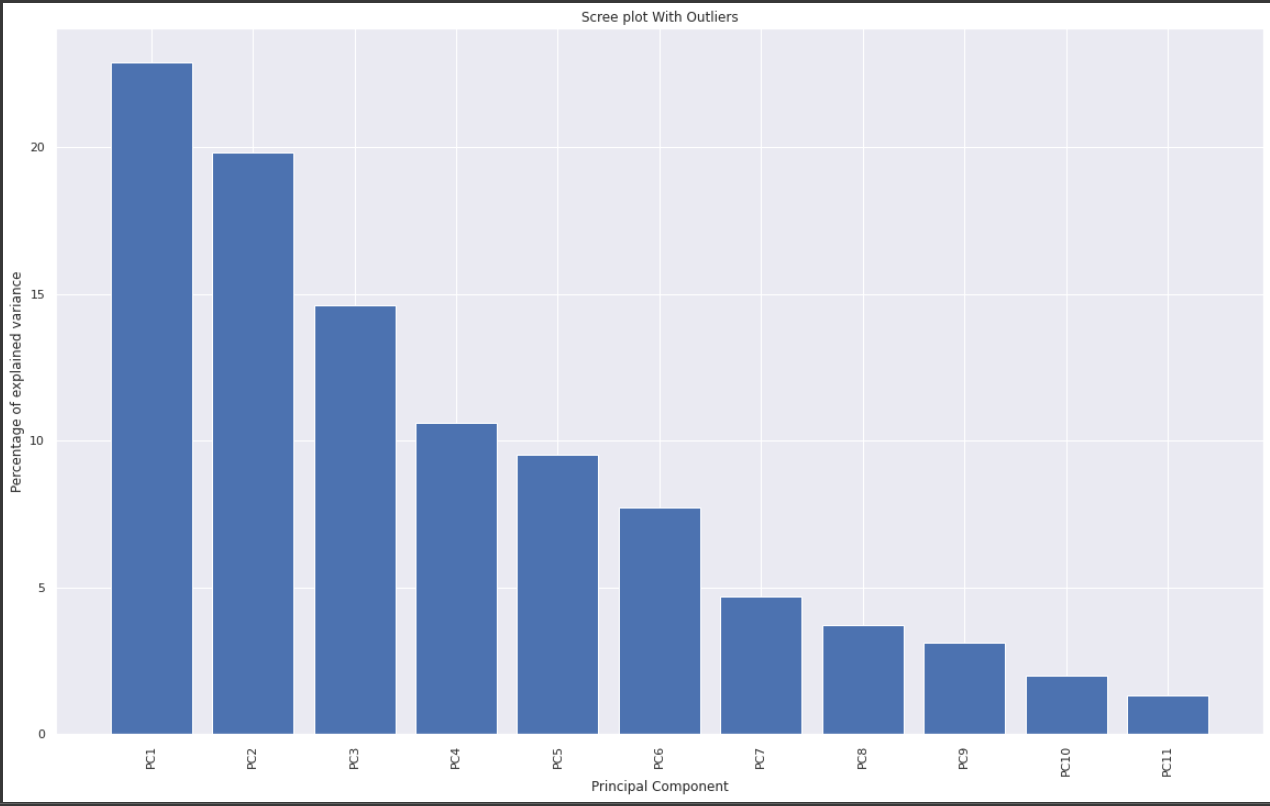

In [ ]:
pca_data = pd.read_csv('pca_data.csv')
pca_data.drop(['Unnamed: 0'], inplace=True, axis=1)


In [ ]:
pca_data_train = pca_data[merged_data['month'] !=1]
pca_data_test = pca_data[merged_data['month'] ==1]

## Creating a Separate Data Frame for all of the 8 Principal Components. We used 8 Principal Components because it equals to around 90% Explained Variance

In [ ]:
df1 = pca_data['0']
df1 = np.array(df1).reshape(-1,1)
df2 = pca_data['1']
df2 = np.array(df2).reshape(-1,1)
df3 = pca_data['2']
df3 = np.array(df3).reshape(-1,1)
df4 = pca_data['3']
df4 = np.array(df4).reshape(-1,1)
df5 = pca_data['4']
df5 = np.array(df5).reshape(-1,1)
df6 = pca_data['5']
df6 = np.array(df6).reshape(-1,1)
df7 = pca_data['6']
df7 = np.array(df7).reshape(-1,1)
df8 = pca_data['7']
df8 = np.array(df8).reshape(-1,1)

## Splitting all of the Principal Components Separately into Train/Test Sets 

In [ ]:
train = df1[df['month']!=1]
test = df1[df['month']==1]
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

train1 = df2[df['month']!=1]
test1 = df2[df['month']==1]
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

train2 = df3[df['month']!=1]
test2 = df3[df['month']==1]
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

train3 = df4[df['month']!=1]
test3 = df4[df['month']==1]
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

train4 = df5[df['month']!=1]
test4 = df5[df['month']==1]
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

train5 = df6[df['month']!=1]
test5 = df6[df['month']==1]
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

train6 = df7[df['month']!=1]
test6 = df7[df['month']==1]
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

train7 = df8[df['month']!=1]
test7 = df8[df['month']==1]
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Training dataset shape: (1442, 1)
Test dataset shape: (744, 1)
Training dataset shape: (1442, 1)
Test dataset shape: (744, 1)
Training dataset shape: (1442, 1)
Test dataset shape: (744, 1)
Training dataset shape: (1442, 1)
Test dataset shape: (744, 1)
Training dataset shape: (1442, 1)
Test dataset shape: (744, 1)
Training dataset shape: (1442, 1)
Test dataset shape: (744, 1)
Training dataset shape: (1442, 1)
Test dataset shape: (744, 1)
Training dataset shape: (1442, 1)
Test dataset shape: (744, 1)


In [ ]:
train1 = df2[df['month']!=1]
test1 = df2[df['month']==1]
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Training dataset shape: (1442, 1)
Test dataset shape: (744, 1)


## Creating the Sliding Window Dataset

In [ ]:
import numpy
def create_dataset(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step):
		a = dataset[i:(i+time_step), 0]    
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

## Creating the Individual Sliding Window Datasets

In [ ]:
X_train, y_train = create_dataset(train, 10)
X_train2, y_train2 = create_dataset(train1, 10)
X_train3, y_train3 = create_dataset(train2, 10)
X_train4, y_train4 = create_dataset(train3, 10)
X_train5, y_train5 = create_dataset(train4, 10)
X_train6, y_train6 = create_dataset(train5, 10)
X_train7, y_train7 = create_dataset(train6, 10)
X_train8, y_train8 = create_dataset(train7, 10)

In [ ]:
X_test, y_test = create_dataset(test, 10)
X_test2, y_test2 = create_dataset(test1, 10)
X_test3, y_test3 = create_dataset(test2, 10)
X_test4, y_test4 = create_dataset(test3, 10)
X_test5, y_test5 = create_dataset(test4, 10)
X_test6, y_test6 = create_dataset(test5, 10)
X_test7, y_test7 = create_dataset(test6, 10)
X_test8, y_test8 = create_dataset(test7, 10)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_train2 =X_train2.reshape(X_train2.shape[0],X_train2.shape[1] , 1)
X_train3 =X_train3.reshape(X_train3.shape[0],X_train3.shape[1] , 1)
X_train4 =X_train4.reshape(X_train4.shape[0],X_train4.shape[1] , 1)
X_train5 =X_train5.reshape(X_train5.shape[0],X_train5.shape[1] , 1)
X_train6 =X_train6.reshape(X_train6.shape[0],X_train6.shape[1] , 1)
X_train7 =X_train7.reshape(X_train7.shape[0],X_train7.shape[1] , 1)
X_train8 =X_train8.reshape(X_train8.shape[0],X_train8.shape[1] , 1)

In [ ]:
X_test =X_test.reshape(X_test.shape[0],X_train.shape[1] , 1)
X_test2 =X_test2.reshape(X_test2.shape[0],X_test2.shape[1] , 1)
X_test3 =X_test3.reshape(X_test3.shape[0],X_test3.shape[1] , 1)
X_test4 =X_test4.reshape(X_test4.shape[0],X_test4.shape[1] , 1)
X_test5 =X_test5.reshape(X_test5.shape[0],X_test5.shape[1] , 1)
X_test6 =X_test6.reshape(X_test6.shape[0],X_test6.shape[1] , 1)
X_test7 =X_test7.reshape(X_test7.shape[0],X_test7.shape[1] , 1)
X_test8 =X_test8.reshape(X_test8.shape[0],X_test8.shape[1] , 1)

In [ ]:
X_train1, y_train1 = create_dataset(train, 10)

## The Code Below Concatenates all of the Train/Test Sets together separately

In [ ]:
a = numpy.zeros(shape=(1432,10,8))
# for x in range(len(X_train)):
#     for y in range(len(X_train[x])):
        
#         new_arr.append(np.append(X_train[x][y], X_train1[x][y][0]))
for x in range(len(a)):
    for y in range(len(a[x])):
        for z in range(len(a[x][y])):
            
            a[x][y] = np.append(X_train[x][y], (X_train2[x][y][0], X_train3[x][y][0], X_train4[x][y][0], X_train5[x][y][0], X_train6[x][y][0], X_train7[x][y][0], X_train8[x][y][0]))

In [ ]:
a_test = numpy.zeros(shape=(734,10,8))
# for x in range(len(X_train)):
#     for y in range(len(X_train[x])):
        
#         new_arr.append(np.append(X_train[x][y], X_train1[x][y][0]))
for x in range(len(a_test)):
    for y in range(len(a_test[x])):
        for z in range(len(a_test[x][y])):
            
            a_test[x][y] = np.append(X_test[x][y], (X_test2[x][y][0], X_test3[x][y][0], X_test4[x][y][0], X_test5[x][y][0], X_test6[x][y][0], X_test7[x][y][0], X_test8[x][y][0]))

## Autoencoder LSTM Model

In [ ]:
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True,
    kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model

In [ ]:
# create the autoencoder model
from keras import optimizers
model = autoencoder_model(a)
adam = optimizers.Adam(0.0001)
model.compile(optimizer=adam, loss='mae')
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10, 8)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 16)            1600      
_________________________________________________________________
lstm_2 (LSTM)                (None, 4)                 336       
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 10, 4)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 10, 4)             144       
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 16)            1344      
_________________________________________________________________
time_distributed_5 (TimeDist (None, 10, 8)             136 

## Training the LSTM Model on the 8 PC Data Plus the Timestep Windows

In [ ]:
nb_epochs = 150
batch_size = 10
history = model.fit(a,a, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Train on 1360 samples, validate on 72 samples
Epoch 1/150
1360/1360 [==============================] - 9s 7ms/step - loss: 0.0502 - val_loss: 0.0776
Epoch 2/150
1360/1360 [==============================] - 4s 3ms/step - loss: 0.0493 - val_loss: 0.0775
Epoch 3/150
1360/1360 [==============================] - 4s 3ms/step - loss: 0.0488 - val_loss: 0.0773
Epoch 4/150
1360/1360 [==============================] - 4s 3ms/step - loss: 0.0484 - val_loss: 0.0770
Epoch 5/150
1360/1360 [==============================] - 4s 3ms/step - loss: 0.0480 - val_loss: 0.0766
Epoch 6/150
1360/1360 [==============================] - 4s 3ms/step - loss: 0.0477 - val_loss: 0.0766
Epoch 7/150
1360/1360 [==============================] - 4s 3ms/step - loss: 0.0475 - val_loss: 0.0764
Epoch 8/150
1360/1360 [==============================] - 4s 3ms/step - loss: 0.0473 - val_loss: 0.0764
Epoch 9/150
1360/1360 [==============================] - 4s 3ms/step - loss: 0.0472 - val_loss: 0.0760
Epoch 10/150
1360/1360 [===

## Training Distribution Loss curve which is used to derive the anamoly threshold Values

(-0.1, 0.5)

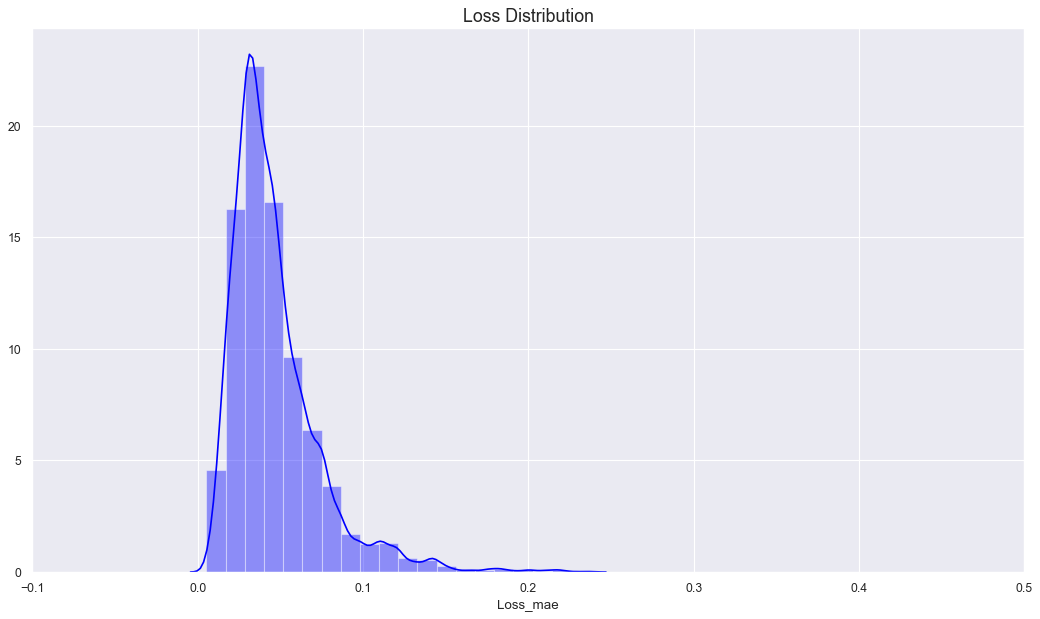

In [ ]:
# plot the loss distribution of the training set
from sklearn.metrics import mean_absolute_error
X_pred = model.predict(a)
X_pred1 = X_pred.reshape(-1,X_pred.shape[2])
X_pred1 = pd.DataFrame(X_pred1, columns=pca_data[['0','1','2','3','4','5','6','7']].columns)
X_pred1.index = np.arange(0,14320)

scored = pd.DataFrame(index=X_pred1.index)
Xtrain = a.reshape(-1,a.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred1-Xtrain), axis = 1)
loss_mae = np.mean(np.abs(X_pred1-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([-0.1,.5])

## Training Thresholds

In [ ]:
threshold1 = np.mean(loss_mae) + 1*np.std(loss_mae)
print(threshold1)
threshold2 = np.mean(loss_mae) + 2*np.std(loss_mae)
print(threshold2)

0.0735576105899143
0.10071855847227545


## Predicting on the Test Set

In [ ]:
# calculate the loss on the test set
X_pred = model.predict(a_test)
X_pred = X_pred.reshape(-1, X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=pca_data[['0','1','2','3','4','5','6','7']].columns)
X_pred.index = np.arange(0,7340)

scored_std_1 = pd.DataFrame(index=X_pred.index)
Xtest = a_test.reshape(-1,a_test.shape[2])
scored_std_1['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
loss_mae_test =  np.mean(np.abs(X_pred-Xtest), axis = 1)
scored_std_1['Threshold_std_1'] = threshold1
scored_std_1['Anomaly_1'] = scored_std_1['Loss_mae'] > scored_std_1['Threshold_std_1']
scored_std_1.head()

,Loss_mae,Threshold_std_1,Anomaly_1
0,0.066339,0.073558,False
1,0.050134,0.073558,False
2,0.060925,0.073558,False
3,0.048893,0.073558,False
4,0.050127,0.073558,False


## Since we have to convert back into two dimensions. We have to extract the original time points. We are using a sliding window dataset so multiple time points will appear more than once.

In [ ]:
import pandas as pd
import numpy as np

scored_std_1['time']=1
scored_std_1.iloc[0:20]
count=10
val = 1
data_array=[]
for x in range(len(scored_std_1)):
    data_sequence = scored_std_1.iloc[count:count+10]
    for y in range(len(data_sequence)):
        values = np.arange(val, val+10)
        data_sequence['time'].iloc[y] = values[y]
    data_array.append(data_sequence)
    count += 10
    val+=1
    continue
    
    

C:\Users\balle\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\balle\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
import pandas as pd
import numpy as np

scored_std_2['time']=1
scored_std_2.iloc[0:20]
count=10
val = 1
data_array_std2=[]
for x in range(len(scored_std_2)):
    data_sequence = scored_std_2.iloc[count:count+10]
    for y in range(len(data_sequence)):
        values = np.arange(val, val+10)
        data_sequence['time'].iloc[y] = values[y]
    data_array_std2.append(data_sequence)
    count += 10
    val+=1
    continue
    
    

C:\Users\balle\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
data_all = pd.DataFrame(data_array[0])
data_all1 = data_all.append(data_array[1:], ignore_index=True)

In [ ]:
data_array_std2

[]

In [ ]:
data_all_std2 = pd.DataFrame(data_array_std2[0])
data_std2 = data_all_std2.append(data_array_std2[1:], ignore_index=True)

In [ ]:
data_all1[data_all1['Anomaly_1']==True].groupby('time').count().to_csv('std_1_Anomalies.csv')

In [ ]:
data_std2[data_std2['Anomaly_2']==True].groupby('time').count().to_csv('std_2_Anomalies.csv')

In [ ]:
data_std2[data_std2['Anomaly_2'] ==True].groupby('time').count()

,Loss_mae,Threshold_std_2,Anomaly_2
time,,,
20,10,10,10
23,10,10,10
46,10,10,10
48,10,10,10
62,10,10,10
...,...,...,...
695,4,4,4
698,1,1,1
702,10,10,10


In [ ]:
scored_std_2 = pd.DataFrame(index=X_pred.index)
Xtest = a_test.reshape(-1,a_test.shape[2])
scored_std_2['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
loss_mae_test =  np.mean(np.abs(X_pred-Xtest), axis = 1)
scored_std_2['Threshold_std_2'] = threshold2
scored_std_2['Anomaly_2'] = scored_std_2['Loss_mae'] > scored_std_2['Threshold_std_2']
scored_std_2.head()

,Loss_mae,Threshold_std_2,Anomaly_2
0,0.066339,0.100719,False
1,0.050134,0.100719,False
2,0.060925,0.100719,False
3,0.048893,0.100719,False
4,0.050127,0.100719,False


In [ ]:
scored_std_1

,Loss_mae,Threshold_std_1,Anomaly_1
0,0.066339,0.073558,False
1,0.050134,0.073558,False
2,0.060925,0.073558,False
3,0.048893,0.073558,False
4,0.050127,0.073558,False
...,...,...,...
7335,0.074002,0.073558,True
7336,0.038063,0.073558,False
7337,0.044106,0.073558,False
7338,0.051166,0.073558,False


In [ ]:
scored_std_2

,Loss_mae,Threshold_std_2,Anomaly_2
0,0.066339,0.100719,False
1,0.050134,0.100719,False
2,0.060925,0.100719,False
3,0.048893,0.100719,False
4,0.050127,0.100719,False
...,...,...,...
7335,0.074002,0.100719,False
7336,0.038063,0.100719,False
7337,0.044106,0.100719,False
7338,0.051166,0.100719,False


In [ ]:
scored.to_csv('Scored_test.csv')